# 你的第一个卷积神经网络
## 导入

In [1]:
import os
import numpy as np
import tensorflow as tf

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

## 数据

In [2]:
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

## 网络结构

In [3]:
input_layer = tf.keras.Input(shape=(32, 32, 3))
conv_layer_1 = tf.keras.layers.Conv2D(filters=10, kernel_size=(4, 4), strides=2, padding="same")(input_layer)
conv_layer_2 = tf.keras.layers.Conv2D(filters=20, kernel_size=(3, 3), strides=2, padding="same")(conv_layer_1)
flatten_layer = tf.keras.layers.Flatten()(conv_layer_2)
output_layer = tf.keras.layers.Dense(units=10, activation="softmax")(flatten_layer)

model = tf.keras.Model(input_layer, output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 10)        490       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [4]:
input_layer = tf.keras.Input((32, 32, 3))
conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(input_layer)
conv1 = tf.keras.layers.BatchNormalization()(conv1)
conv1 = tf.keras.layers.LeakyReLU()(conv1)
conv2 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(conv1)
conv2 = tf.keras.layers.BatchNormalization()(conv2)
conv2 = tf.keras.layers.LeakyReLU()(conv2)
conv3 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(conv2)
conv3 = tf.keras.layers.BatchNormalization()(conv3)
conv3 = tf.keras.layers.LeakyReLU()(conv3)
conv4 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(conv3)
conv4 = tf.keras.layers.BatchNormalization()(conv4)
conv4 = tf.keras.layers.LeakyReLU()(conv4)
flatten_layer = tf.keras.layers.Flatten()(conv4)
dense1 = tf.keras.layers.Dense(128)(flatten_layer)
dense1 = tf.keras.layers.BatchNormalization()(dense1)
dense1 = tf.keras.layers.LeakyReLU()(dense1)
dense1 = tf.keras.layers.Dropout(rate=0.5)(dense1)
dense2 = tf.keras.layers.Dense(NUM_CLASSES)(dense1)
output_layer = tf.keras.layers.Activation("softmax")(dense2)

model = tf.keras.Model(input_layer, output_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                           

## 训练

In [5]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True, validation_data=(x_test, y_test))

Epoch 1/10


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node model_1/conv2d_2/Conv2D
 (defined at c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\keras\layers\convolutional.py:231)
]] [Op:__inference_train_function_1917]

Errors may have originated from an input operation.
Input Source operations connected to node model_1/conv2d_2/Conv2D:
In[0] IteratorGetNext (defined at c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\keras\engine\training.py:866)	
In[1] model_1/conv2d_2/Conv2D/ReadVariableOp:

Operation defined at: (most recent call last)
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\runpy.py", line 194, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
>>>     app.start()
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
>>>     self.io_loop.start()
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\asyncio\base_events.py", line 570, in run_forever
>>>     self._run_once()
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\asyncio\base_events.py", line 1859, in _run_once
>>>     handle._run()
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\asyncio\events.py", line 81, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\tornado\ioloop.py", line 688, in <lambda>
>>>     lambda f: self._run_callback(functools.partial(callback, future))
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\tornado\ioloop.py", line 741, in _run_callback
>>>     ret = callback()
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\tornado\gen.py", line 814, in inner
>>>     self.ctx_run(self.run)
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\tornado\gen.py", line 775, in run
>>>     yielded = self.gen.send(value)
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
>>>     yield gen.maybe_future(dispatch(*args))
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\tornado\gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
>>>     yield gen.maybe_future(handler(stream, idents, msg))
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\tornado\gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
>>>     self.do_execute(
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\tornado\gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\IPython\core\interactiveshell.py", line 2886, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\IPython\core\interactiveshell.py", line 2932, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\IPython\core\interactiveshell.py", line 3155, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\IPython\core\interactiveshell.py", line 3347, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\IPython\core\interactiveshell.py", line 3427, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "<ipython-input-5-a3d6812d6950>", line 4, in <module>
>>>     model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True, validation_data=(x_test, y_test))
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\keras\engine\training.py", line 808, in train_step
>>>     y_pred = self(x, training=True)
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\keras\engine\functional.py", line 451, in call
>>>     return self._run_internal_graph(
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
>>>     outputs = node.layer(*args, **kwargs)
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\keras\layers\convolutional.py", line 246, in call
>>>     outputs = self.convolution_op(inputs, self.kernel)
>>> 
>>>   File "c:\Users\86153\Anaconda3\envs\TensorFlow\lib\site-packages\keras\layers\convolutional.py", line 231, in convolution_op
>>>     return tf.nn.convolution(
>>> 

## 分析

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8710 - accuracy: 0.7043


[0.8710238337516785, 0.7042999863624573]

In [ ]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

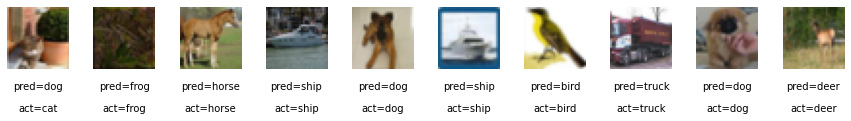

In [ ]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis("off")
    ax.text(0.5, -0.35, "pred=" + str(preds_single[idx]), fontsize=10, ha="center", transform=ax.transAxes)
    ax.text(0.5, -0.7, "act=" + str(actual_single[idx]), fontsize=10, ha="center", transform=ax.transAxes)
    ax.imshow(img)